In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bank_data = pd.read_csv("bank_note_data.csv")

In [4]:
bank_data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


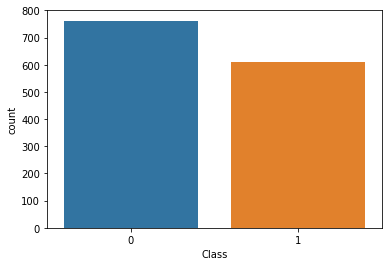

In [6]:
sns.countplot(data=bank_data,x="Class")

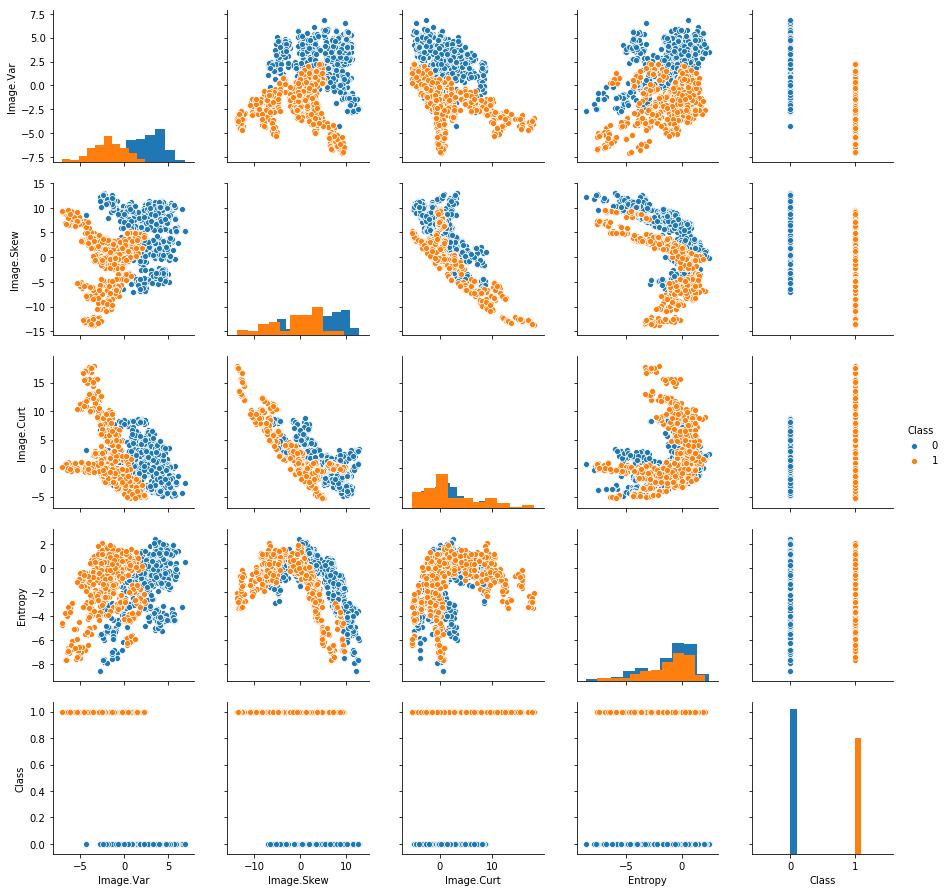

In [14]:
sns.pairplot(data=bank_data,hue="Class",diag_kind="hist")

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [18]:
scaler.fit(bank_data.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
scaled_features = scaler.fit_transform(bank_data.drop('Class',axis=1))

In [23]:
scaled_data = pd.DataFrame(scaled_features,columns=bank_data.columns[:-1])

In [24]:
scaled_data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [25]:
X = scaled_data

In [26]:
y = bank_data['Class']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
import tensorflow as tf

In [30]:
scaled_data.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [31]:
image_var = tf.feature_column.numeric_column("Image.Var")
image_skew = tf.feature_column.numeric_column('Image.Skew')
image_curt = tf.feature_column.numeric_column('Image.Curt')
entropy =tf.feature_column.numeric_column('Entropy')

In [32]:
data_cols = [image_var,image_skew,image_curt,entropy]

In [33]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10, 20, 10], n_classes=2,feature_columns=data_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Rodrigo\\AppData\\Local\\Temp\\tmpkt8ue81w', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000024EDF75E748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [34]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=20,shuffle=True)

In [35]:
classifier.train(input_fn=input_func,steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Rodrigo\AppData\Local\Temp\tmpkt8ue81w\model.ckpt.
INFO:tensorflow:loss = 15.003563, step = 1
INFO:tensorflow:Saving checkpoints for 48 into C:\Users\Rodrigo\AppData\Local\Temp\tmpkt8ue81w\model.ckpt.
INFO:tensorflow:Loss for final step: 0.2710304.


In [36]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [37]:
note_predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rodrigo\AppData\Local\Temp\tmpkt8ue81w\model.ckpt-48
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [38]:
note_predictions[0]

{'logits': array([5.0352798], dtype=float32),
 'logistic': array([0.9935376], dtype=float32),
 'probabilities': array([0.00646234, 0.9935376 ], dtype=float32),
 'class_ids': array([1], dtype=int64),
 'classes': array([b'1'], dtype=object)}

In [39]:
final_preds  = []
for pred in note_predictions:
    final_preds.append(pred['class_ids'][0])

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(confusion_matrix(y_test,final_preds))

[[238   8]
 [  0 166]]


In [42]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       246
           1       0.95      1.00      0.98       166

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc = RandomForestClassifier(n_estimators=200)

In [45]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
rfc_preds = rfc.predict(X_test)

In [47]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       246
           1       0.98      1.00      0.99       166

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [48]:
print(confusion_matrix(y_test,rfc_preds))

[[243   3]
 [  0 166]]
